In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
experiments_folder = "../experiments/MACJorge/total/"
#experiments_path = []
from os import listdir
from os.path import isfile, join
experiments_names = [f for f in listdir(experiments_folder) if isfile(join(experiments_folder, f))]
experiments_names
#df = pd.read_csv(experiments_path, index_col=False)

['experiments_insurance.csv',
 'experiments_water.csv',
 'experiments_hailfinder.csv',
 'experiments_alarm.csv',
 'experiments_child.csv',
 'experiments.csv',
 'experiments_link.csv',
 'experiments_hepar2.csv',
 'experiments_win95pts.csv']

In [4]:
# Getting list of dataframes
dfs = [pd.read_csv(experiments_folder + name, index_col=False) for name in experiments_names if name != "experiments.csv"]
# Merging and fixing names
df = pd.concat(dfs)
df.reset_index()
df = df.rename(columns={" network": "network", " bbdd": "bbdd", " thread": "thread", " interleaving": "interleaving", " seed": "seed",
          " SHD": "SHD", " dfMM": "dfMM", " LL Score" : "LL Score", " BDeu Score":"BDeu Score", " dfMM" : "dfMM", " dfMM plus" : "dfMM plus", " Total iterations" : "Total iterations",
          " Total time(s)": "Total time(s)"})
df.head()

,algorithm,network,bbdd,thread,interleaving,seed,SHD,LL Score,BDeu Score,dfMM,dfMM plus,Total iterations,Total time(s)
0,ges,res/networks/insurance,insurance.xbif50001_,0,5,-1,65,-0.699473,-95442.209515,5.851852,0.0,158.0,0
1,hc,res/networks/insurance,insurance.xbif50001_,1,5,-1,31,-0.500500,-71651.860392,2.518519,4.0,64.0,9
2,pfhcbes,res/networks/insurance,insurance.xbif50001_,1,5,2,36,-0.690717,-72479.353472,3.333333,16.0,74.0,9
3,pges,res/networks/insurance,insurance.xbif50001_,1,5,2,29,-0.536837,-70803.201760,2.444444,4.0,62.0,10
4,phc,res/networks/insurance,insurance.xbif50001_,1,5,2,36,-0.690717,-72479.353472,3.333333,16.0,74.0,9


In [5]:
df_means = df.groupby(["algorithm", "network", "bbdd", "thread", "interleaving"], as_index=False).mean()
df_means.head()

,algorithm,network,bbdd,thread,interleaving,seed,SHD,LL Score,BDeu Score,dfMM,dfMM plus,Total iterations,Total time(s)
0,ges,res/networks/alarm,alarm.xbif50001246_,0,5,-1.0,64.0,-0.480403,-91244.856692,3.837838,4.0,138.0,0.0
1,ges,res/networks/alarm,alarm.xbif50001246_,0,10,-1.0,59.0,-0.424482,-81103.761853,3.567568,4.0,128.0,0.0
2,ges,res/networks/alarm,alarm.xbif50001246_,0,15,-1.0,54.0,-0.381306,-73456.981443,3.297297,4.0,118.0,0.0
3,ges,res/networks/alarm,alarm.xbif50001_,0,5,-1.0,64.0,-0.481082,-89913.454089,3.837838,4.0,138.0,0.0
4,ges,res/networks/alarm,alarm.xbif50001_,0,10,-1.0,59.0,-0.424459,-79630.193938,3.567568,4.0,128.0,0.0


In [ ]:
# not in ["ges", "hc"]

In [7]:
df_threads = df_means.loc[~df_means["algorithm"].isin(["ges", "hc"])]
df_threads.head()

,algorithm,network,bbdd,thread,interleaving,seed,SHD,LL Score,BDeu Score,dfMM,dfMM plus,Total iterations,Total time(s)
421,pfhcbes,res/networks/alarm,alarm.xbif50001246_,1,5,12.9,21.1,-0.416781,-57661.909078,1.497297,19.0,36.4,11.0
422,pfhcbes,res/networks/alarm,alarm.xbif50001246_,1,10,12.9,22.0,-0.417192,-57568.039836,1.459459,20.4,33.6,6.2
423,pfhcbes,res/networks/alarm,alarm.xbif50001246_,1,15,12.9,22.9,-0.403019,-57741.103302,1.529730,20.6,36.0,5.0
424,pfhcbes,res/networks/alarm,alarm.xbif50001246_,2,5,12.9,24.8,-0.426525,-57843.586818,1.600000,22.4,36.8,8.6
425,pfhcbes,res/networks/alarm,alarm.xbif50001246_,2,10,12.9,21.1,-0.446487,-57478.415759,1.383784,17.8,33.4,7.9


In [ ]:
#def plot_line(data, x, y):
#    plt.figure(figsize=(16/1.5,9/1.5))
#    sns.lineplot(data, x=x, y=y, hue="algorithm") 

Int64Index([15, 5, 10], dtype='int64')

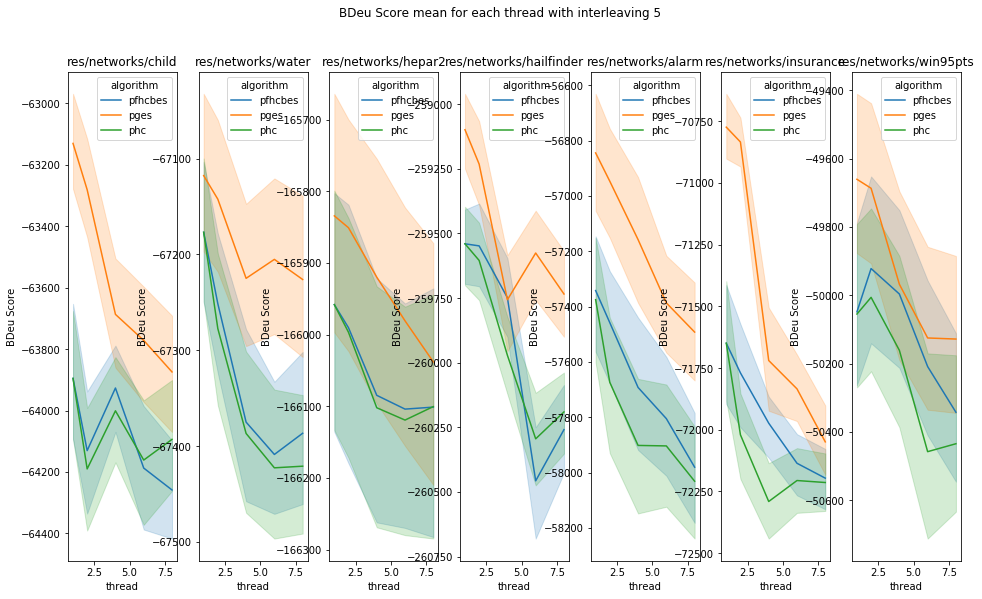

In [44]:
# PLOTS CON INTERLEAVING 5
fig, axes = plt.subplots(1, 7, figsize=(16,9))
fig.suptitle('BDeu Score mean for each thread with interleaving ' + str(5))
for i, name in enumerate(df_threads["network"].value_counts().index):
    #if(i == 7):
    #    break
    sns.lineplot(data=df_threads.loc[(df_threads["network"] == name) & (df_threads["interleaving"] == 5)], x="thread", y="BDeu Score", hue="algorithm", ax=axes[i])
    axes[i].set_title(name)


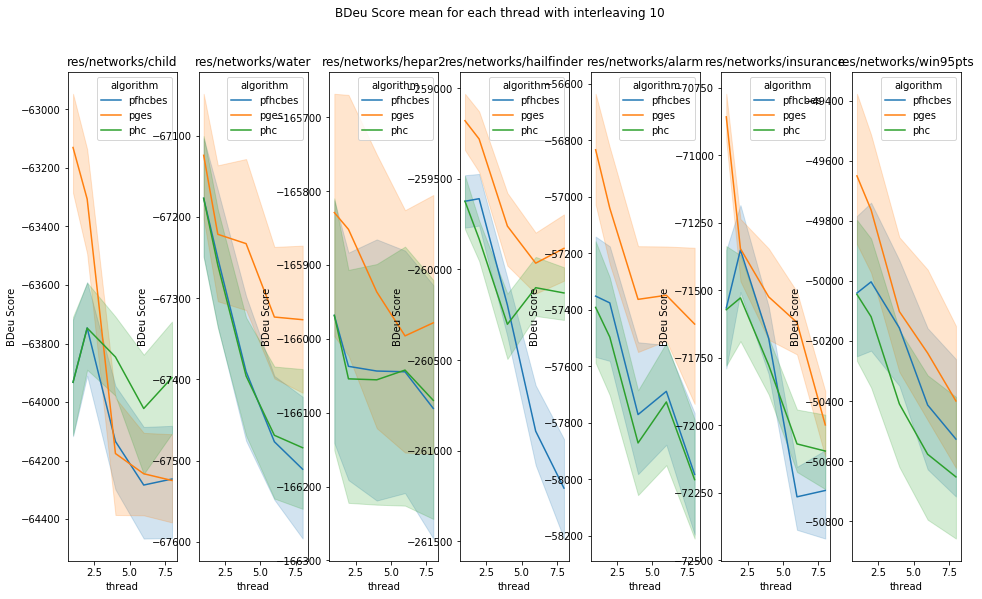

In [45]:
# PLOTS CON INTERLEAVING 10
fig, axes = plt.subplots(1, 7, figsize=(16,9))
fig.suptitle('BDeu Score mean for each thread with interleaving ' + str(10))
for i, name in enumerate(df_threads["network"].value_counts().index):
    #if(i == 7):
    #    break
    sns.lineplot(data=df_threads.loc[(df_threads["network"] == name) & (df_threads["interleaving"] == 10)], x="thread", y="BDeu Score", hue="algorithm", ax=axes[i])
    axes[i].set_title(name)


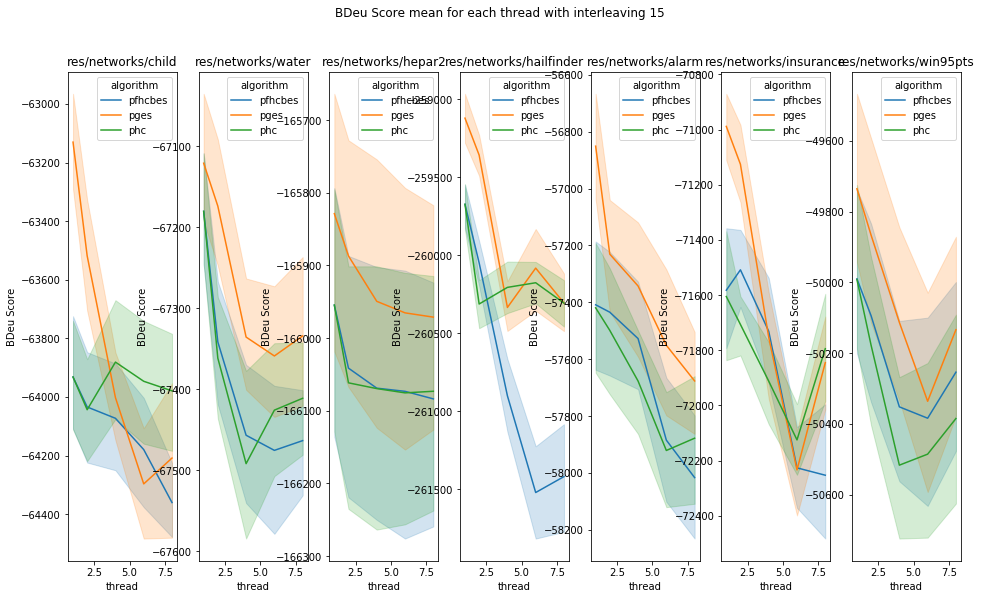

In [46]:
# PLOTS CON INTERLEAVING 15
fig, axes = plt.subplots(1, 7, figsize=(16,9))
fig.suptitle('BDeu Score mean for each thread with interleaving ' + str(15))
for i, name in enumerate(df_threads["network"].value_counts().index):
    #if(i == 7):
    #    break
    sns.lineplot(data=df_threads.loc[(df_threads["network"] == name) & (df_threads["interleaving"] == 15)], x="thread", y="BDeu Score", hue="algorithm", ax=axes[i])
    axes[i].set_title(name)


In [ ]:
plot_line(df[], ((df["algorithm"] != "ges") & (df["algorithm"] != "hc")), "thread", "BDeu Score")

In [ ]:
plot_line(df, (df["algorithm"] != "ges") & (df["algorithm"] != "hc"), "thread", "BDeu Score")

In [ ]:
plot_line(df, (df["algorithm"] != "ges") & (df["algorithm"] != "hc"), "thread", "SHD")

In [ ]:
plot_line(df, (df["algorithm"] != "ges") & (df["algorithm"] != "hc"), "thread", "dfMM")

In [ ]:
plot_line(df, (df["algorithm"] != "ges") & (df["algorithm"] != "hc"), "thread", "dfMM")

In [ ]:
#df_pges.groupby(["algorithm", "network", "bbdd", "thread", "interleaving"]).std()

In [ ]:
?sns.lineplot

In [ ]:
#sns.lineplot(data=flights, x="year", y="passengers", hue="month")